Universidad del Valle de Guatemala
Inteligencia Artificial
Laboratorio 4 Regresion lineal
Jorge Caballeros Perez

### Laboratorio 4 Linear Regression

Importamos la libreria numpy y pandas para manejar el csv

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Utilizamos pandas para incialmente poder leer la informacion del csv.

In [152]:
# cargar archivo CSV en un DataFrame de Pandas
df = pd.read_csv("kc_house_data.csv", usecols=["id", "date", "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"])

# imprimir el DataFrame
print(df)


               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

###Task 1.1
Pasamos de un pd.csv a un numpy array para un mejor uso de las variables.

In [153]:
cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
df = df[cols]

# convertir el DataFrame en un numpy array
data = df.to_numpy()
# Obtenemos el shape del dataset
data_size = data.shape[0]

# imprimir el numpy array
print(data)

[[7129300520 '20141013T000000' 221900.0 ... -122.257 1340 5650]
 [6414100192 '20141209T000000' 538000.0 ... -122.319 1690 7639]
 [5631500400 '20150225T000000' 180000.0 ... -122.233 2720 8062]
 ...
 [1523300141 '20140623T000000' 402101.0 ... -122.299 1020 2007]
 [291310100 '20150116T000000' 400000.0 ... -122.069 1410 1287]
 [1523300157 '20141015T000000' 325000.0 ... -122.299 1020 1357]]


almacenamos las columnas price y sqft_living en sus respectivas variables para su posterior uso. Imprimimos sus valores.

In [154]:
x = data[:, 5].astype(float).reshape(-1, 1)
y = data[:, 2].astype(float).reshape(-1, 1)

Ajustamos el modelo polinomial de regresion lineal en base al juego de dados cargando de forma matricial que relaciona las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos.


In [155]:
# En este caso usamos la columna de onese para la matriz de caracteristicas
X_r =  np.hstack((np.ones_like(x), x))

print(X_r)

[[1.00e+00 1.18e+03]
 [1.00e+00 2.57e+03]
 [1.00e+00 7.70e+02]
 ...
 [1.00e+00 1.02e+03]
 [1.00e+00 1.60e+03]
 [1.00e+00 1.02e+03]]


Realizamos una funcion para la regresion lineal 

In [156]:
def linreg(x, y, t, costo, gradiente, a=0.01, n=100, onStep=None):
    costos = []
    for i in range(n):
        t -= a * gradiente(x, y, t)
        costos.append(costo(x, y, t))

        if onStep:
            onStep(t)

    return t, costos

Definimos las funciones del gradiente y costo como funciones lambda

In [157]:
cost =  lambda x,y,t: ((x @ t - y) ** 2).sum() / (2 * len(y))
gradient = lambda x,y,t: 2 * x.T @ (x @ t - y) / len(y)

Definimos un theta inicial, final y los costos

In [158]:
th_o = np.random.rand(X_r.shape[1], 1)

th_f , costos = linreg(X_r, y, th_o, cost, gradient, a=0.000000003, n=1000)

print(th_f)
print(costos)

[[2.30986666e-01]
 [2.63089096e+02]]
[201773684989.0432, 191547651833.58917, 181946139851.70508, 172931008477.0228, 164466446452.19434, 156518829574.04276, 149056587126.45798, 142050076470.46167, 135471465293.26965, 129294621048.60329, 123495007149.06894, 118049585498.24406, 112936724975.2945, 108136115508.59091, 103628687396.99544, 99396535558.3337, 95422848404.14119, 91691841058.14944, 88188692653.23244, 84899487457.7345, 81811159597.31354, 78911441152.7146, 76188813427.30054, 73632461190.75711, 71232229717.21269, 68978584447.11247, 66862573112.61072, 64875790176.02936, 63010343440.120125, 61258822697.494606, 59614270294.686806, 58070153493.918106, 56620338522.77627, 55259066208.72443, 53980929101.651855, 52780849993.58947, 51654061750.262535, 50596088374.364784, 49602727225.3303, 48670032324.97426, 47794298682.68633, 46972047577.91114, 46200012741.4526, 45475127380.709335, 44794511997.301094, 44155462948.69321, 43555441708.382095, 42992064781.979546, 42463094239.13858, 41966428823.7

Definimos un valor Xm, Xmr y el valor de la funcion de regresion lineal

In [159]:
Xm = np.array([[0],[data_size]])
Xmr = np.hstack((np.ones((2,1)), Xm))
# Linear Regression
Ym = Xmr @ th_f
print(Xm)
print(Ym)

[[    0]
 [21613]]
[[2.30986666e-01]
 [5.68614486e+06]]


Randomizamos el theta inicial 

In [160]:
th_o =  np.random.rand(X_r.shape[1], 1)
th_o = th_o[~np.isnan(th_o)].reshape(len(th_o), 1)
print(th_o)

[[0.45732569]
 [0.81118711]]


### Graficas de costos, relacion entre Sqft_living y price
Definimos una funcion para la grafica de los costos .

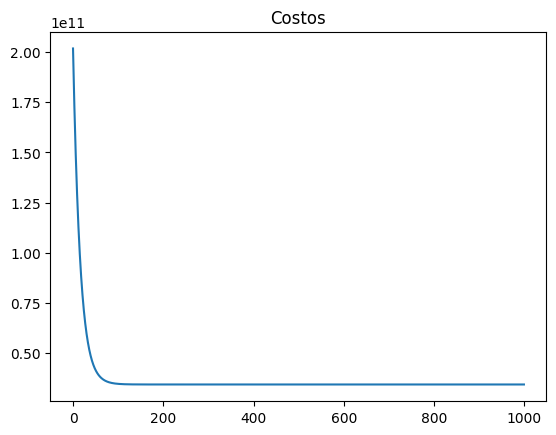

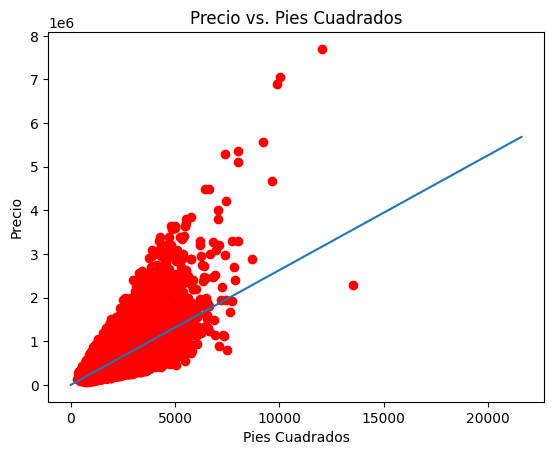

In [161]:
def GraphCost(costos):
    plt.plot(costos)
    plt.title('Costos')
    plt.show()
    plt.close()

def GraphPriceVsSqrFt(x,y,xm,ym):
    plt.title('Precio vs. Pies Cuadrados')
    plt.plot(x, y, 'ro')
    plt.plot(xm, ym)
    plt.xlabel('Pies Cuadrados')
    plt.ylabel('Precio')
    
# Implementamos las funciones de graficacos

GraphCost(costos)
GraphPriceVsSqrFt(x,y,Xm,Ym)


Ahora podemos establecer nuestra division de Dataset de entrenamiento y prueba

In [162]:
# Entrenamiento y prueba
train_S = int(0.9 * data_size)
trainX, pruebaX = np.split(X_r, [train_S])
trainY, pruebaY = np.split(y, [train_S])
grado = range(1, 11)
mse = np.zeros(len(grado))
for i, degree in enumerate(grado):
    p = np.polyfit(trainX[:, 1], trainY[:, 0], degree)
    predictionY = np.polyval(p, pruebaX[:, 1])
    mse[i] = np.mean((pruebaY[:, 0] - predictionY) ** 2)
    
gradM = grado[np.argmin(mse)]
print(gradM)
p = np.polyfit(X_r[:, 1], y[:, 0], gradM)
polinomio = np.poly1d(p)
p = np.polyfit(x[:,0], y[:,0], 3)
final = np.poly1d(p)
predictionX = np.linspace(x.min(), x.max(), 100)
predictionY = final(predictionX)

print(predictionX.shape)
print(predictionY.shape)

8
(100,)
(100,)


Ahora podemos graficar nuestra regresion lineal y mostrar nuestro polinomio.

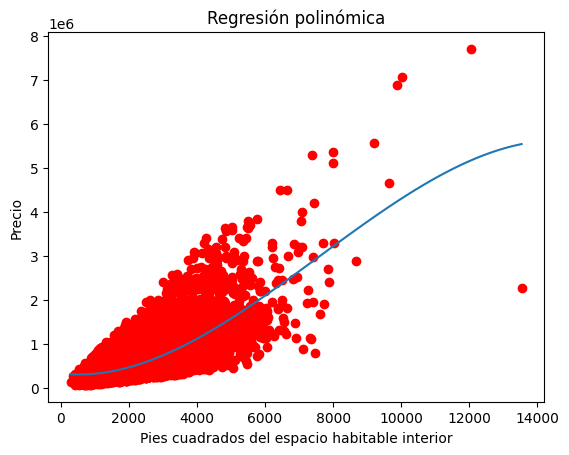

           8             7             6             5             4
3.935e-24 x - 1.853e-19 x + 3.397e-15 x - 3.091e-11 x + 1.479e-07 x
              3          2
 - 0.0003646 x + 0.4652 x - 136.8 x + 2.36e+05


In [163]:
# Funcion para graficar la regresion lineal
def LinearRegression(x,y,predictionX, predictionY):
    plt.plot(x, y, 'ro')
    plt.plot(predictionX, predictionY)
    plt.title("Regresión polinómica")
    plt.xlabel('Pies cuadrados del espacio habitable interior')
    plt.ylabel('Precio')
    plt.show()
    

LinearRegression(x[:,0], y[:,0],predictionX, predictionY)
print(polinomio)